<a href="https://www.kaggle.com/code/shilongzhuang/attack-on-titanic-solution-no-data-leakage?scriptVersionId=114771369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Solution Beginner Walkthrough

The purpose of this notebook is to show how I have navigated through the Kaggle Titanic project by following an effective Data Science Workflow.

I will always treat this notebook as a **work in progress** because I will continuously seek to improve my work as I gain more knowledge and understanding throughout my Data Science learning journey.

## Data Science Workflow
> The foundation of this workflow was based on the author's citations in this [notebook](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook). I figured there was still room for more C's.
- **Comprehend.** *Exploratory Data Analysis.* Understand the nature and relationships among each features in the datasets through data analyses and visualization.
- **Correlate.** *Feature Selection* Validate the strength of association across features with the appopriate statistical tools and metrics, and to select the features that are significantly relevant with the solution goal.
- **Clean.** *Data Cleaning.* Identify and remedy missing/null values by imputing them with reasonable inputs.  
- **Create.** *Feature Engineering.* Create new features out of the existing ones which can make better predictions while also reducing noise in the number of features.
- **Classify.** *Feature Engineering.* Practice more advanced feature engineering involving effectively classifying labels/classes that are similar in terms of distribution, which also aims to reduce noise.
- **Convert.** *Data Preprocessing.* Perform the necessary adjustments (one-hot encoding) and data transformations (i.e. sqrt, log trasformations) to make the data fit for modelling.
- **Complete.** *Training Model.* Completion of a working and cleaned dataset in preparation for training the model and predicting solutions out of it. 
- **Configure.** *Hyperparameter Tuning.* Further optimize our learning algorithms by determining and running the optimal parameters. 
- **Combine.** *Ensemble Learning.* Combine multiple algorithms into one that can leverage the strengths and compensates the weaknesses of the tested models.

## Assumptions
To prevent **data leakage and cheating,** analyses and data transformations will exclusively be done and derived based on training data alone without the support of the test data.
> Data leakage happens when information outside of train set was used to assist in creating model. While there is merits to substantially achieve higher scores on our train and validation sets alone, this model will usually result in poorer performances when ran on other testing sets that are **new** and **unseen.** 

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire Training and Testing Data

The information regarding the features are explicitly presented [HERE](https://www.kaggle.com/competitions/titanic/data?select=train.csv) in detail.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
len(test_df)/(len(train_df)+len(test_df))

0.31932773109243695

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations

**Distribution**
- The train-test is split around 70/30, with testing set representing 31.93% of the combined sets.
- The survival rate in context of the training set is at 38.38%, which is representative of the original survival rate of 32.46%, 1502 out of 2224.
- Majority (around 75%) of the people didn't aboard with siblings/spouses.
- The distributions of SibSP and Parch are right skewed, since the means are greater than the medians.

**Data Types**
- Numerical: *Age, Sibsp, Parch, Fare*
- Categorical: *Survival, Sex, Pclass, Embarked*
- Mixed/Alphanumeric: *Name, Ticket, Cabin*

In [9]:
# Create and set palette
colors = ['#006D77', '#83C5BE', '#EDF6F9', '#FFDDD2', '#E29578']
sns.set_palette(sns.color_palette(colors))

# Exploratory Data Analysis
For the numerical variables, the seaborn **pairplot** will be helpful in presenting the pariwise relationships across each numerical variables. The diagonal plots are the main focus here as they are treated as distribution plots of the features. The rest is just being extra and for eye candy.

In [10]:
survived=['#E29578', '#006D77']

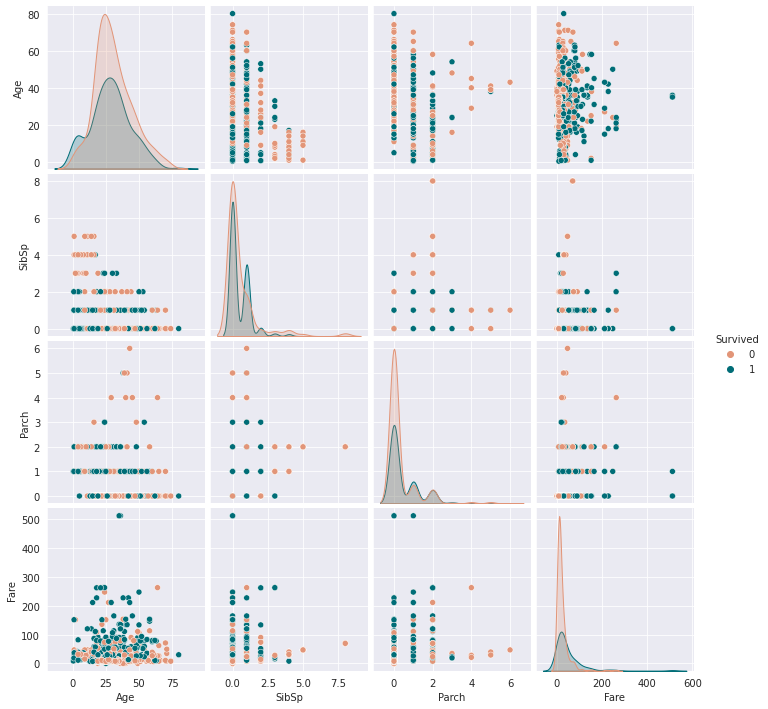

In [11]:
# Separate the training set into groups of numerical and categorical variables.
# Don't worry, the 'Survived' was only included in the numerical category so we can use it to classify the features when we create the pairplot
df_num = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Embarked']]

# Classify by 'Survived'
sns.set_style('darkgrid')
sns.pairplot(df_num, hue='Survived', palette=survived)

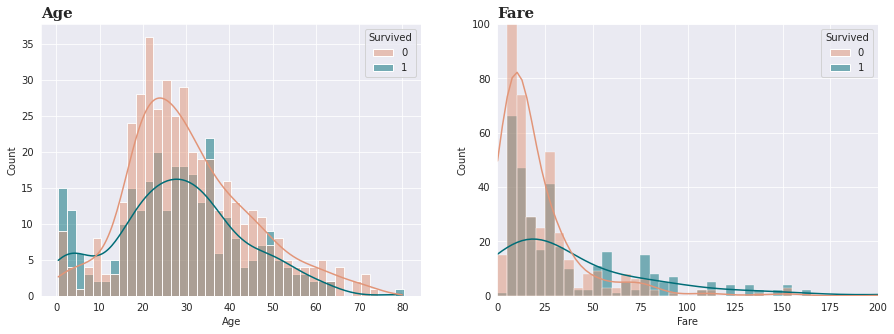

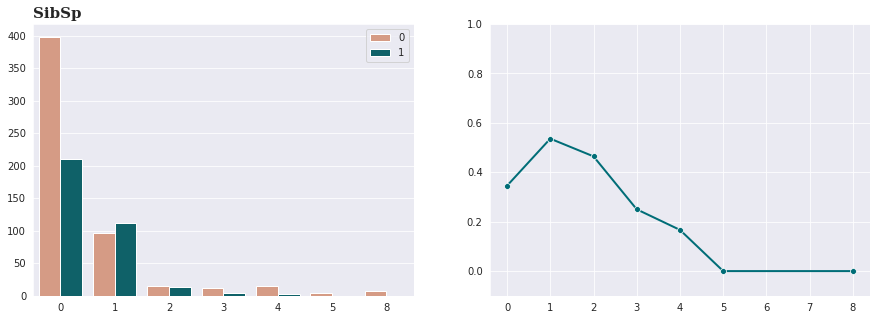

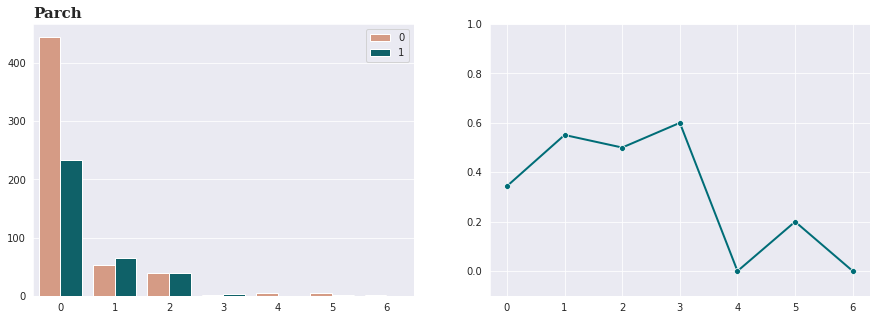

In [12]:
fig= plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,2,1)
sns.histplot(data=train_df, x="Age", hue="Survived", binwidth=2, kde=True, palette=survived)
plt.title('Age',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')

plt.subplot(1,2,2)
sns.histplot(data=train_df, x="Fare", hue="Survived", binwidth=5, kde=True, palette=survived)
plt.title('Fare',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')

# Zoomed along the axes for clearer observation of Fare distribution
plt.xlim([0, 200])
plt.ylim([0, 100])

# Define a function to create countplots with the desired style and format
def count_plot(df, x, y):
    fig = plt.figure(figsize = (15, 5))
    
    plt.subplot(1,2,1)
    ax = sns.countplot( x=df[x].dropna(), hue=df[y], palette=survived)
    plt.legend(loc='upper right')
    plt.title(str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    ax.set(xlabel=None, ylabel=None)
    
    plt.subplot(1,2,2)
    plt.ylim(-0.1, 1)
    ax = sns.lineplot(x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o", color='#006D77')
    ax.set(xlabel=None, ylabel=None)
    
    plt.show()

count_plot(train_df, 'SibSp', 'Survived')
count_plot(train_df, 'Parch', 'Survived')

(0.0, 100.0)

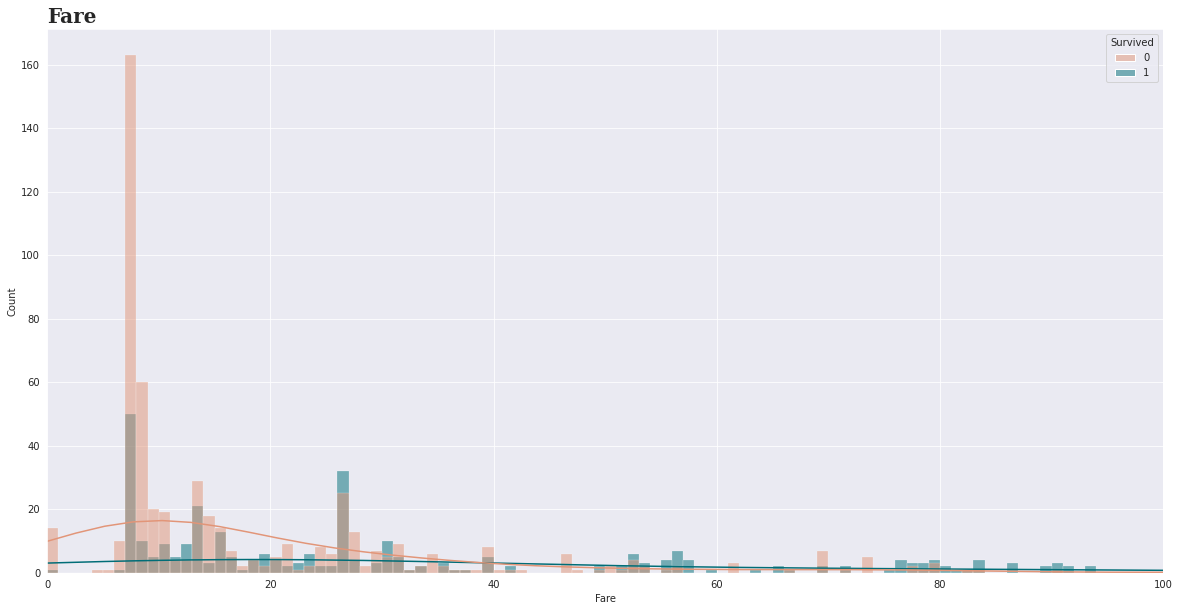

In [13]:
fig= plt.figure(figsize=(20, 10))
sns.histplot(data=train_df, x="Fare", hue="Survived", binwidth=1, kde=True, palette=survived)
plt.title('Fare',
          fontsize = 20,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')

plt.xlim([0, 100])

**Age**
- More normally distributed compared to the rest.
- Majority of passengers fall in the 20-35 age bracket.
- A large number of 20-30 yr olds didn't survive.
- Infants (age<4) had one of the highest survival rates.
- The oldest individual (age=80) survived.

**SibSp**
- Those with 1-2 siblings/spouses were likely to survive.
- Large number of passengers didn't have siblings/spouses with them.
- An outlier, with over 8 siblings/spouses, didn't survive.

**Parch**
- Those with 1-3 parents/children were likely to survive
- Large number of passengers didn't have parents/children with them.
- Passengers without parents and children with them were more likely to die.

**Fare**
- Skewed to the right.
- Majority of the passengers aboarded with cheaper fares.
- Most passengers with cheaper fares (<50) didn't survive, while those who paid higher fares (>300) tend to survive.

## Correlating Numerical Features

<AxesSubplot:>

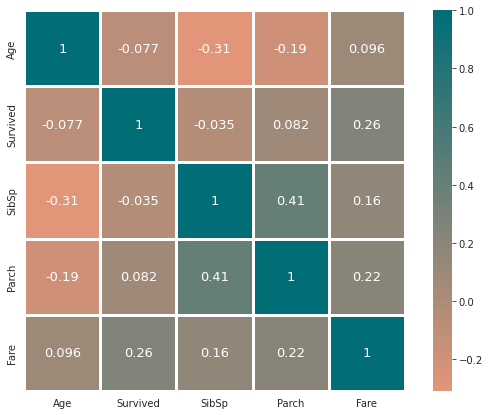

In [14]:
import matplotlib.colors

# Assign palette to cmap in sns.heatmap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", survived)

plt.subplots(figsize=(10,7))
sns.heatmap(df_num.corr(), cmap=cmap, annot=True, linewidths=3, annot_kws={"fontsize":13}, square=True)

## Categorical Features
Let's use **countplots** to visualize the distribution of each categorical feature with respect to survival, and **lineplots** to determine the corresponding survival rates (in % form). 

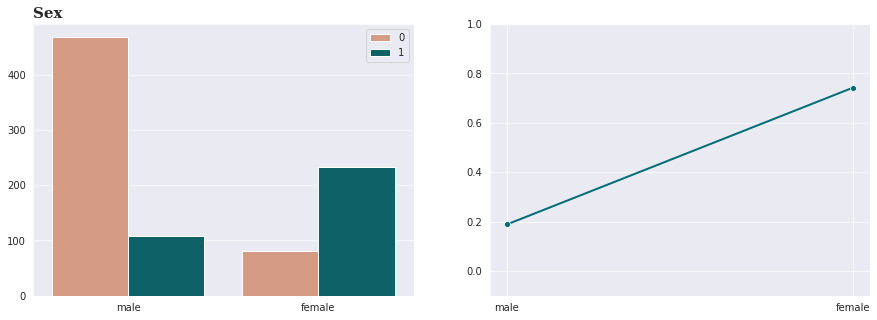

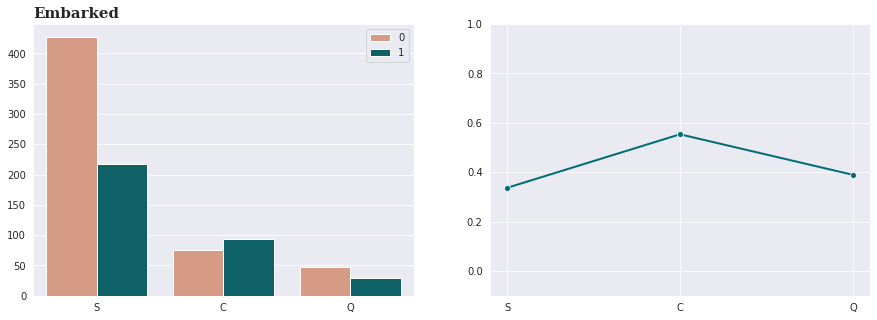

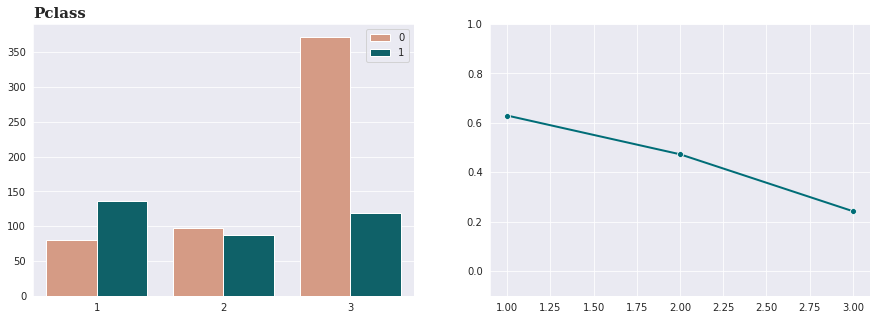

In [15]:
count_plot(train_df, 'Sex', 'Survived')
count_plot(train_df, 'Embarked', 'Survived')
count_plot(train_df, 'Pclass', 'Survived')

#### Observations

**Sex**
- More males were on board.
- Females had a higher survival rate than males did. No wonder Jack died over Rose.

**Pclass**
- Most passengers were in Pclass 3. 
- The significance of higher classes being correlated with higher survival rate is justified.
- Pclass 1 is the only class with more survived passengers than dead passengers.

**Embarked**
- A major chunk of the passengers embarked from Southampton, and the least from Queensland.
- Highest survival rate were found for passengers that embarked from C.

# Feature Engineering

## Feature Engineering Alphanumeric Features
- Create *Name_Length* from passengers' names.
- Create *Title* from passengers' names.
- Create *Last_Name* from passengers' names.
- Create *Deck* from the first letter/unit in *Cabin.*
- Create *Family_Survival*

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


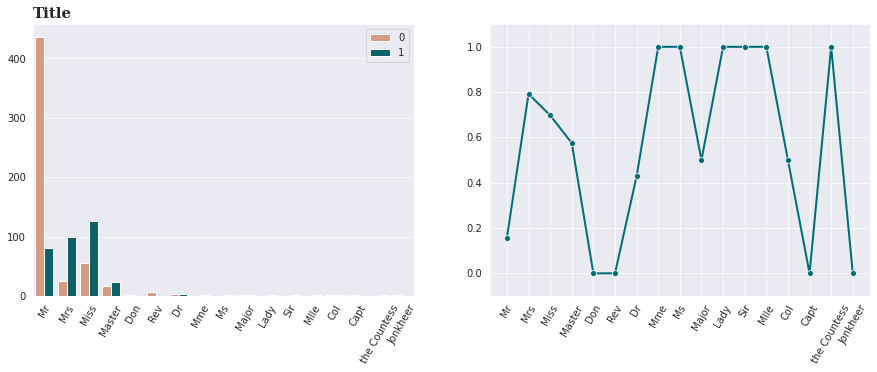

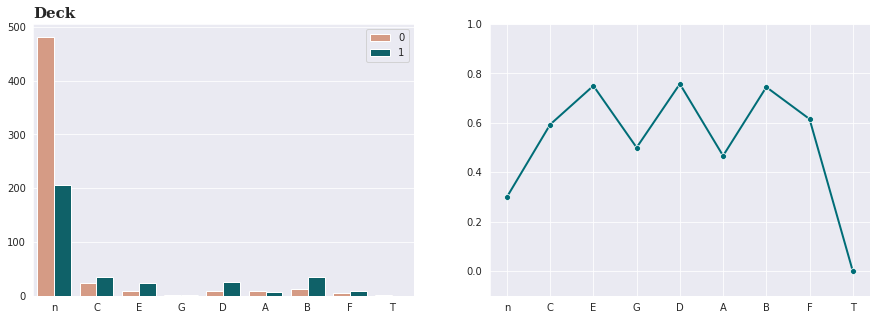

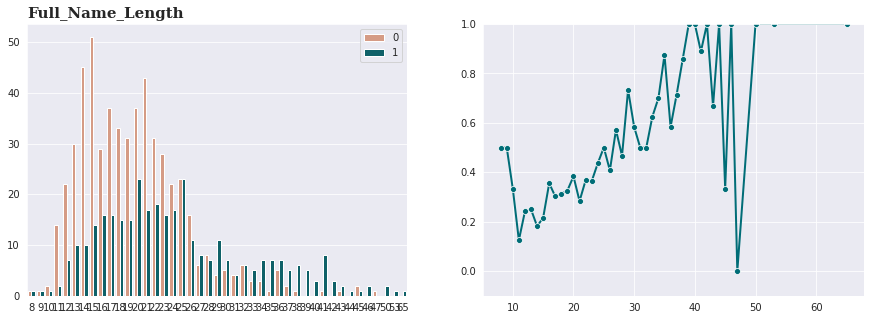

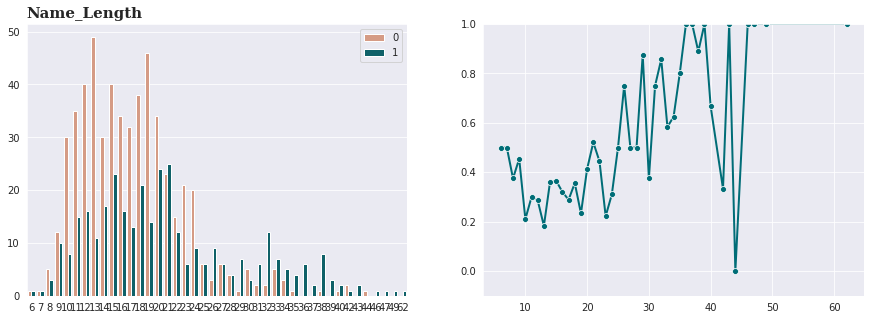

In [16]:
for dataset in df:
    # Create Title    
    # Split the full name into a list by comma, then return the title by indexing the 2nd position [1]
    # Split the name into a list by period, then return the title by indexing the 1st position [0]
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    dataset['Full_Name_Length'] = dataset['Name'].str.replace("[^a-zA-Z]", "").str.len()
    dataset['Name_Length'] = dataset['Name'].str.replace("[^a-zA-Z]", "").str.len() - dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).str.len()
    dataset['Last_Name'] = dataset['Name'].apply(lambda x: x.strip().split(',')[0])
    
    # Create Deck
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: str(x)[0])
    

# Adjust count_plot function with additional formatting (rotate x_labels)
def count_plot_adj(df, x, y):
    fig = plt.figure(figsize = (15, 5))
    
    plt.subplot(1,2,1)
    ax = sns.countplot(x=df[x], hue=df[y], palette=survived)
    plt.legend(loc='upper right')
    plt.title(str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    plt.xticks(rotation=60)
    ax.set(xlabel=None, ylabel=None)
    
    plt.subplot(1,2,2)
    plt.ylim(-0.1, 1.1)
    ax = sns.lineplot(x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o", color=colors[0])
    plt.xticks(rotation=60)
    ax.set(xlabel=None, ylabel=None)

count_plot_adj(train_df, 'Title', 'Survived')
count_plot(train_df, 'Deck', 'Survived')
count_plot(train_df, 'Full_Name_Length', 'Survived')
count_plot(train_df, 'Name_Length', 'Survived')

- The name_length was created under the premise that longer names are associated with higher class.
- A linear association between name_length and survival rate can be observed along the **range(10, 35)**

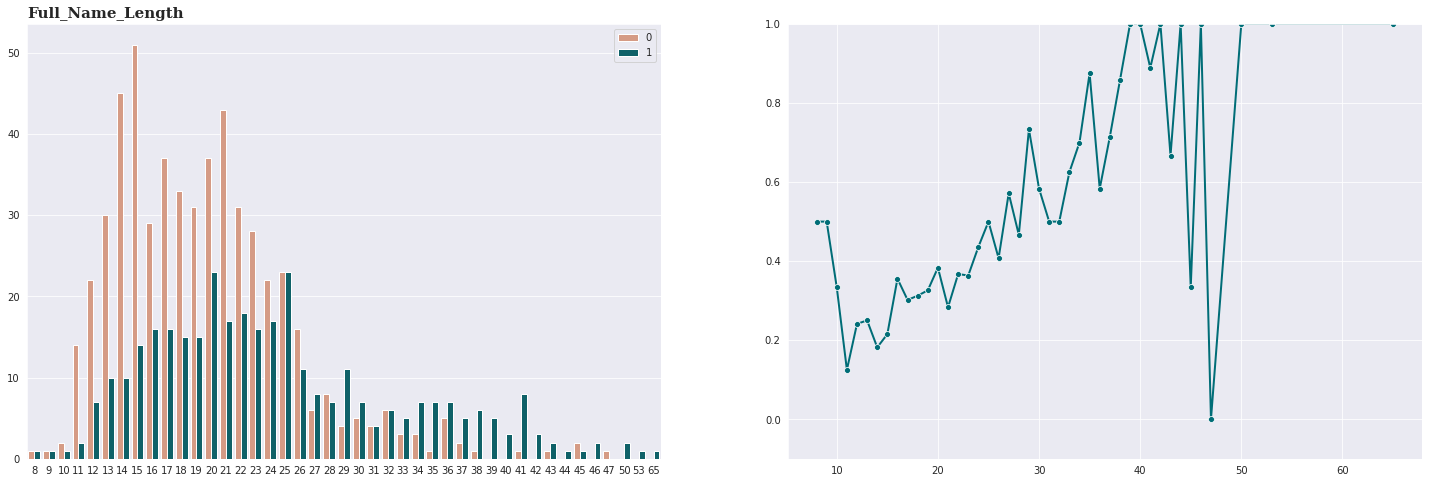

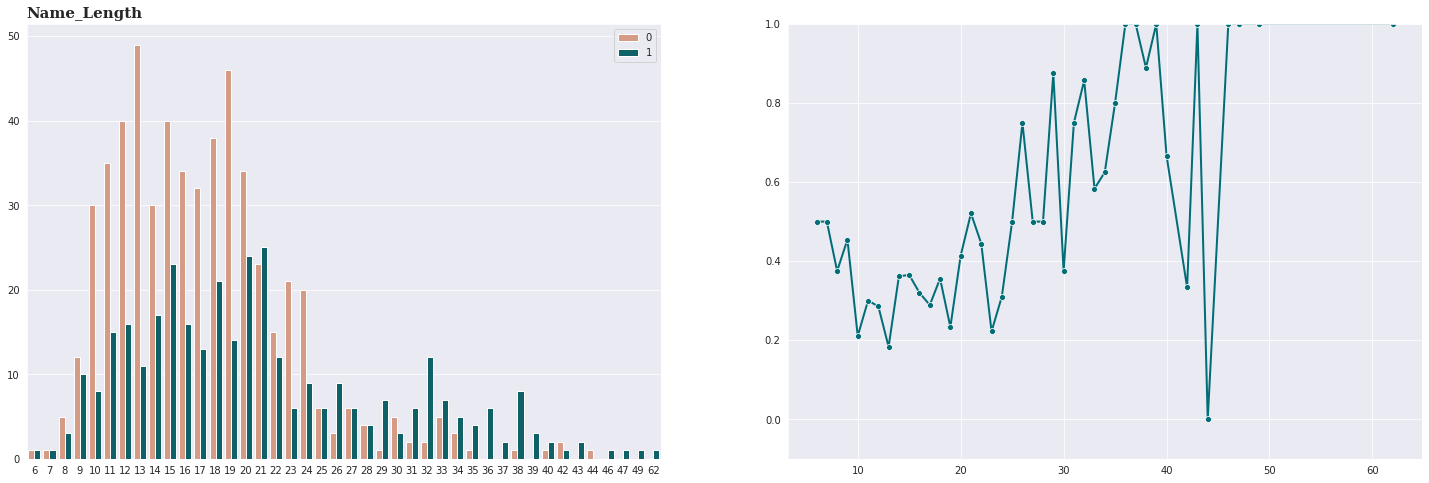

In [17]:
# Define a function to create countplots with the desired style and format
def count_plot_size(df, x, y, l, w):
    fig = plt.figure(figsize = (l, w))
    
    plt.subplot(1,2,1)
    ax = sns.countplot( x=df[x].dropna(), hue=df[y], palette=survived)
    plt.legend(loc='upper right')
    plt.title(str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    ax.set(xlabel=None, ylabel=None)
    
    plt.subplot(1,2,2)
    plt.ylim(-0.1, 1)
    ax = sns.lineplot(x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o", color='#006D77')
    ax.set(xlabel=None, ylabel=None)
    
    plt.show()
    
count_plot_size(train_df, 'Full_Name_Length', 'Survived', 25, 8)
count_plot_size(train_df, 'Name_Length', 'Survived', 25, 8)

<AxesSubplot:xlabel='Deck', ylabel='Pclass'>

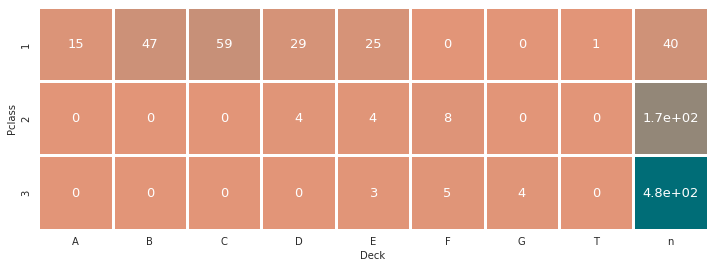

In [18]:
# Joint distribution between Pclass and Deck
Deck_Pclass = train_df.groupby(['Pclass', 'Deck'])['Deck'].size().unstack().fillna(0)
plt.subplots(figsize=(12,12))
sns.heatmap(Deck_Pclass, cmap=cmap, annot=True, annot_kws={"fontsize":13}, linewidths=3, square=True, cbar=False)

## Understanding Title Prefixes

- **Rev.** Ministers of most Christian denominations; ordained clergymen since 17th century.
- **Mlle, Mme, Miss.** Unmarried female; young lady.
- **Master.** Boys (<15 yrs old)
- **Major, Don.** Lord, master, or owner (of a household).
- **Col.** Colonel; army officer of high rank.
- **the Countess.** Wife or widow of a count.
- **Capt.** could refer to the captain of the ship.
- **Ms.** Any women regardless of marital status.
- **Lady.** Princesses or daughters of royal blood.
- **Jonkheer.** Female equivalent denoting the lowest rank within the nobility.

## Understanding Cabins and Decks

I did some research and here is what I found:
- There are certain parts/decks in the ship that were only exclusively accessible to passengers of belonging to certain *Pclasses.*
- The **front half** of the ship reached the bottom first, followed by the other **back half** two minutes later.
- It appears that Amidships, located at the middle of the ship, is typically where most of the passengers stayed.
- A detailed list of Cabins and List can be found in the link below:
> [Titanic Facts: The Layout of the Ship | Dummies](https://www.dummies.com/article/academics-the-arts/history/20th-century/titanic-facts-the-layout-of-the-ship-180759/)
 - Cabins at Decks **A, B, C** were exclusively reserved for **Pclass 1.**
 - Cabins at Deck **D, E** were shared by all **Pclass 1, 2, 3.**
 - Cabins at Deck **F** were shared by **Pclass 2 and 3.**
 - Decks **G, T** were stated to be mostly occupied by crew members, but the presence of Pclass 1 in T makes me assume that there were only a small group of Pclass 1 there, but still dominated by Pclass 2 and 3.


- Classify *Title* based from researched information:
 - Mlle and Ms > Miss
 - Mme > Mrs
 - Uncommon titles that had a higher survival rate will be assumed/regarded as elite status > Elite
 - Remaining uncommon titles > Others


- Null values will be treated as a label. From meta-analysis alone, it can be inferred that majority of the cabin decks weren't obtained from the passengers who died.

## Classify *Title and DeckGroup*

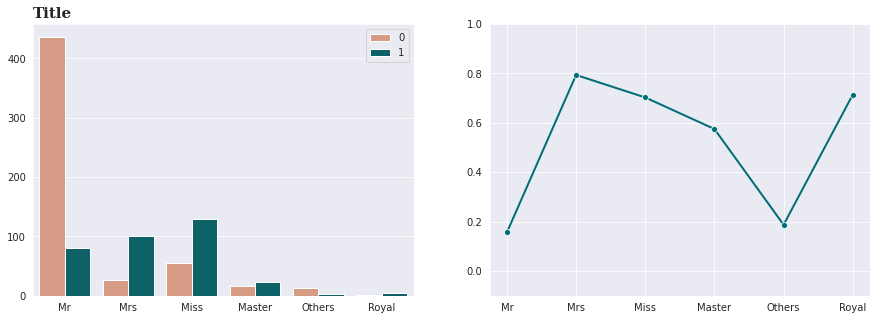

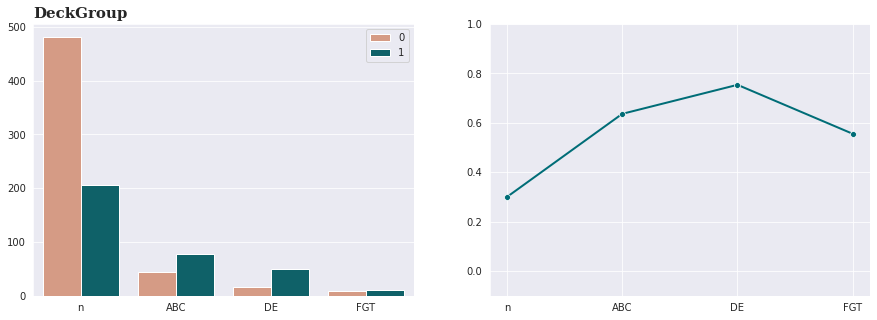

In [19]:
for dataset in df:
    # Classify Title
    dataset['Title_Group'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title_Group'] = dataset['Title'].replace('Mme', 'Mrs', inplace=True)
    dataset['Title_Group'] = dataset['Title'].replace(['Col', 'Lady', 'Major', 'Sir',"the Countess"], 'Royal', inplace=True)
    dataset['Title_Group'] = dataset['Title'].replace(['Capt', 'Dona', 'Dr', 'Capt', 'Rev', 'Don','Jonkheer'], 'Others', inplace=True)
    
    # DeckGroup
    dataset.loc[(dataset.Deck == 'A') |
                (dataset.Deck == 'B') |
                (dataset.Deck == 'C'), 'DeckGroup'] = 'ABC'
    
    dataset.loc[(dataset.Deck == 'D') |
                (dataset.Deck == 'E'), 'DeckGroup'] = 'DE'    
    
    dataset.loc[(dataset.Deck == 'F') |
                (dataset.Deck == 'G') |
                (dataset.Deck == 'T'), 'DeckGroup'] = 'FGT'   
    
    dataset.loc[dataset.Deck == 'n', 'DeckGroup'] = 'n'
    
count_plot(train_df, 'Title', 'Survived')
count_plot(train_df, 'DeckGroup', 'Survived')

**Titles**

- It justifies the correlation between 'Sex' and 'Survived' as titles with 'Mr' and 'Master' tend to have lower survival rates than 'Mrs' and 'Miss'.
- The 'Others' category compiles a very small sample of the given dataset. Despite these titles having characterized of nobile status, it appears that they were trivial at the time of the crisis.

In [20]:
# Combine train and test
full_df = pd.concat([train_df, test_df]).reset_index(drop=True)

train_shape = train_df.shape
test_shape = test_df.shape

## Create *Family_Survival_Rate*
This feature represents the average survival rate of passenger's group or family. Combining the train and test data makes this feature construction easier.

In [21]:
mean_survival_rate = round(np.mean(full_df['Survived']), 4)

full_df['FamilyGroup_Survival'] = mean_survival_rate
full_df['Null_FamilyGroup_Survival'] = 1

# Match the corresponding FamilyGroup_Survival within same Last_Name
# For remaining Null_FamilyGroup_Survival, match with similar Ticket and Cabin numbers

# Iterate over each Last_Name group 
for _, grp_df in full_df[['Survived', 'Last_Name', 'Ticket', 'PassengerId']].groupby('Last_Name',):                       
    if (len(grp_df) > 1):
        if(grp_df['Survived'].isnull().sum() != len(grp_df)):
            
            # For every PassengerId belonging to the same Last_Name, input the corresponding FamilyGroup_Survival
            for ind, row in grp_df.iterrows():
                full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'FamilyGroup_Survival'] = round(grp_df['Survived'].mean(), 4)
                full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'Null_FamilyGroup_Survival'] = 0

# Iterate over each Ticket group              
for _, grp_df in full_df[['Survived', 'Last_Name', 'Ticket', 'PassengerId', 'FamilyGroup_Survival']].groupby('Ticket'):
    if (len(grp_df) > 1):
        for ind, row in grp_df.iterrows():
            if (row['FamilyGroup_Survival'] == 0) | (row['FamilyGroup_Survival'] == mean_survival_rate):
                if(grp_df['Survived'].isnull().sum() != len(grp_df)):
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'FamilyGroup_Survival'] = round(grp_df['Survived'].mean(), 4)
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'Null_FamilyGroup_Survival'] = 0
                    
# Iterate over each Cabin group              
for _, grp_df in full_df[['Survived', 'Last_Name', 'Ticket', 'Cabin', 'PassengerId', 'FamilyGroup_Survival']].groupby('Cabin'):
    if (len(grp_df) > 1):
        for ind, row in grp_df.iterrows():
            if (row['FamilyGroup_Survival'] == 0) | (row['FamilyGroup_Survival'] == mean_survival_rate):
                if(grp_df['Survived'].isnull().sum() != len(grp_df)):
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'FamilyGroup_Survival'] = round(grp_df['Survived'].mean(), 4)
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'], 'Null_FamilyGroup_Survival'] = 0

In [22]:
full_df[['Last_Name', 'Ticket', 'Deck', 'Cabin', 'Survived', 'FamilyGroup_Survival']].sort_values(by=['Last_Name', 'Ticket'], ascending=True).head(50)

,Last_Name,Ticket,Deck,Cabin,Survived,FamilyGroup_Survival
845,Abbing,C.A. 5547,n,NaN,0.0,0.3838
279,Abbott,C.A. 2673,n,NaN,1.0,0.5000
746,Abbott,C.A. 2673,n,NaN,0.0,0.5000
1283,Abbott,C.A. 2673,n,NaN,NaN,0.5000
948,Abelseth,348122,F,F G63,NaN,0.0000
1236,Abelseth,348125,n,NaN,NaN,0.3838
308,Abelson,P/PP 3381,n,NaN,0.0,0.5000
874,Abelson,P/PP 3381,n,NaN,1.0,0.5000
1142,Abrahamsson,SOTON/O2 3101284,n,NaN,NaN,0.3838
899,Abrahim,2657,n,NaN,NaN,0.3838


## Impute Missing *Embarked*

According to this [source](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html), Miss Rose Amélie Icard, 38, was born in Vaucluse, France on 31 October 1872, her father Marc Icard lived at Mafs á Murs (?).

She boarded the Titanic at **Southampton** as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572). Given this information, I impute the remaining null values by S.

In [23]:
full_df[full_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Full_Name_Length,Name_Length,Last_Name,Deck,Title_Group,DeckGroup,FamilyGroup_Survival,Null_FamilyGroup_Survival
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,NaN,Miss,15,11,Icard,B,None,ABC,1.0,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,NaN,Mrs,32,29,Stone,B,None,ABC,1.0,0


In [24]:
full_df.loc[61, 'Embarked'] = "S"
full_df.loc[829, 'Embarked'] = "S"

## One Hot Encode Categorical Features

In [25]:
full_df = pd.get_dummies(full_df, columns=['Sex', 'Embarked', 'DeckGroup'])

## Feature Engineering Numerical Features

- Create *FamilySize* by combining *SibSp* and *Parch*.
- Create *FareBin* by binning *Fare*.
- Create *Child* and *Senior* from *Age*.
- *FamilySize* can be further classified into *Alone (FamilySize=1), Small (2 to 4), Large (>5).*

In [26]:
# Creating FamilySize
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1

# Creating FareBin
def fare_bin(fare):
    if fare <= 9:
        return 1  
    elif fare <= 40 and fare > 9:
        return 2
    else:
        return 3

full_df.loc[:, 'FareBin'] = full_df['Fare'].apply(fare_bin).astype('int')

In [27]:
# It is also possible to obtain the optimal number of bins by
# running corr() tests over a range of bin parameters through a for loop.

# from scipy import stats
# from sklearn.preprocessing import LabelEncoder

# label = LabelEncoder()

# # Optimize bins for Fare via Pearson's corr test
# # Define a function to iterate through a number of different bin values
# def corr_test(x, x_bin, min, max):
    
#     row = 0
    
#     # Setting up dataframe where
#         # i = no. of bins
#         # R = Pearson's R; strength of correlation
#         # p_value = statistical significance
        
#     Corr = ['i', 'R', 'p_value']
#     Corr_tests = pd.DataFrame(columns = Corr)

#     # Select a range of values for bins to test with 
#     for i in range(min, max):
        
#         Corr_tests.loc[row, 'i'] = i

#         # Return R, p_value and store in dataframe
#         train_df[x_bin] = pd.qcut(train_df[x], i)
#         train_df[x_bin] = label.fit_transform(train_df[x_bin])
#         r, p = stats.pearsonr(train_df[x_bin], train_df['Survived'])

#         Corr_tests.loc[row, 'R'] = r
#         Corr_tests.loc[row, 'p_value'] = p

#         row += 1

#     # Print out dataframe
#     Corr_tests.sort_values(by=['R'], ascending=False, inplace=True)
#     return Corr_tests

# corr_test('Fare', 'FareGroup', 2, 15)

## Imputing *Age, Fare*

In [28]:
# Filter out numerical features
imp_features = full_df.select_dtypes(include=np.number).columns.tolist()
imp_features.remove('Survived')

In [29]:
imp_features

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Full_Name_Length',
 'Name_Length',
 'FamilyGroup_Survival',
 'Null_FamilyGroup_Survival',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'DeckGroup_ABC',
 'DeckGroup_DE',
 'DeckGroup_FGT',
 'DeckGroup_n',
 'FamilySize',
 'FareBin']

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, missing_values=np.nan)
imputer.fit(full_df[imp_features])

full_df.loc[:, imp_features] = pd.DataFrame(imputer.transform(full_df[imp_features]), index=full_df.index, columns = imp_features)

## Create *Child*, *Elder*

In [31]:
full_df['Child'] = 0
full_df['Elder'] = 0
full_df.loc[full_df['Age'] <= 6, 'Child'] = 1
full_df.loc[full_df['Age'] > 62, 'Elder'] = 1

## Classify *FamilySize* to *Alone*

In [32]:
# Classify FamilySize
full_df['Alone'] = 0
full_df.loc[full_df['FamilySize'] == 1, 'Alone'] = 1

# Feature Selection

Before we trim down our features, let's look at the correlation matrix of our features:

<AxesSubplot:>

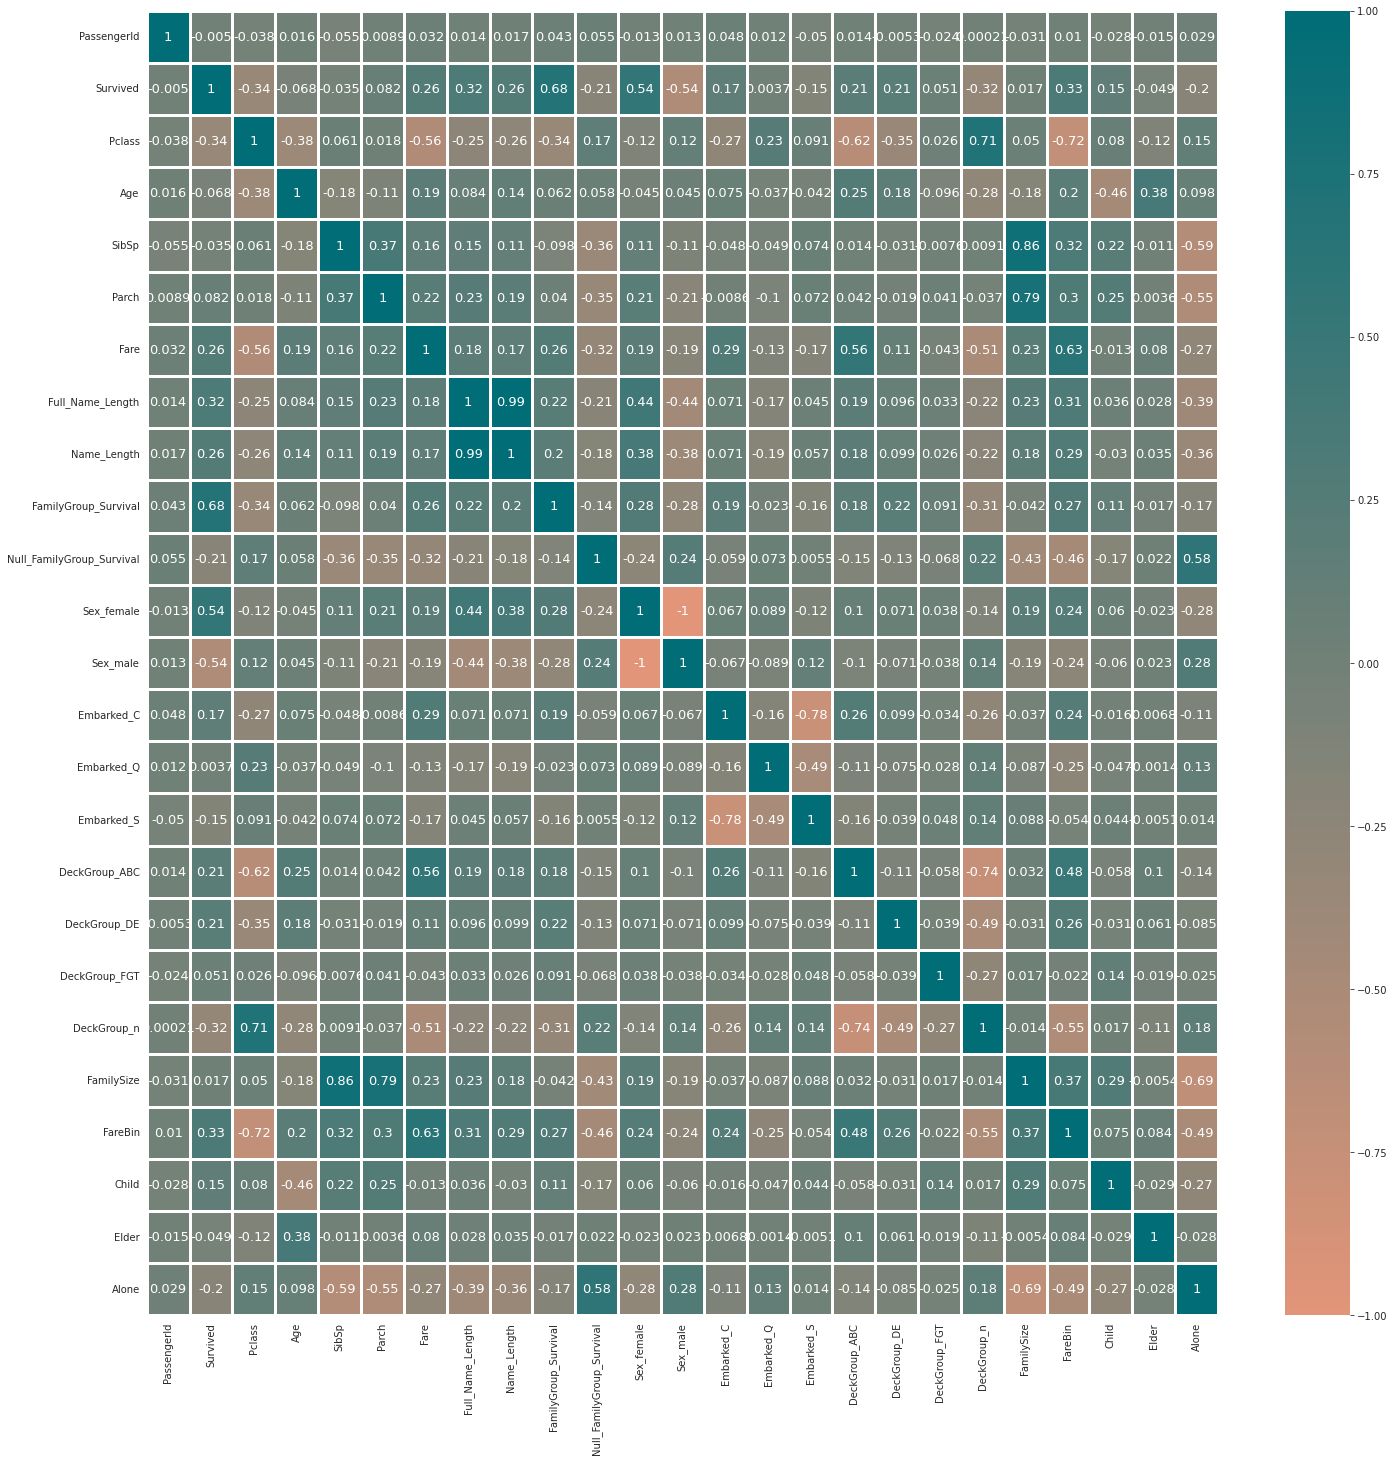

In [33]:
plt.subplots(figsize=(24, 24))
sns.heatmap(full_df.corr(), cmap=cmap,
            annot=True,
            linewidths=3,
            annot_kws={"fontsize":13},
#             square=True
           )

There are some redundant features here that need to be manually moved including:
- *Sex_Female* in favor of *Sex_Male*
- I will remove *Name_Length* in favor of *Full_Name_Length*

In [34]:
full_df.drop(columns=['PassengerId', 'Sex_female', 'Name_Length'], inplace=True)

# Model Preparation
## Trasnforming Numerical Features
The **probability plot** or **quantile-quntile plot (QQplot)** allows us to plot our sample data against the quantiles of a normal distribution. This will serve as reference to see how our subsequent data transformations react to the curve, and enable us to select the best form of transformation which resulted to the best fit.

We can try use the following data transformation techniques:
- Square Root
- Cube Root
- Logarithmic. **Log(x+1)** wil ensure the log transformation won't result in undefined values because our data contains 'zero' values, and log(0) returns undefined.

In [35]:
# Split back to train and test data
train_df = full_df[:train_shape[0]]
test_df = full_df[train_shape[0]:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

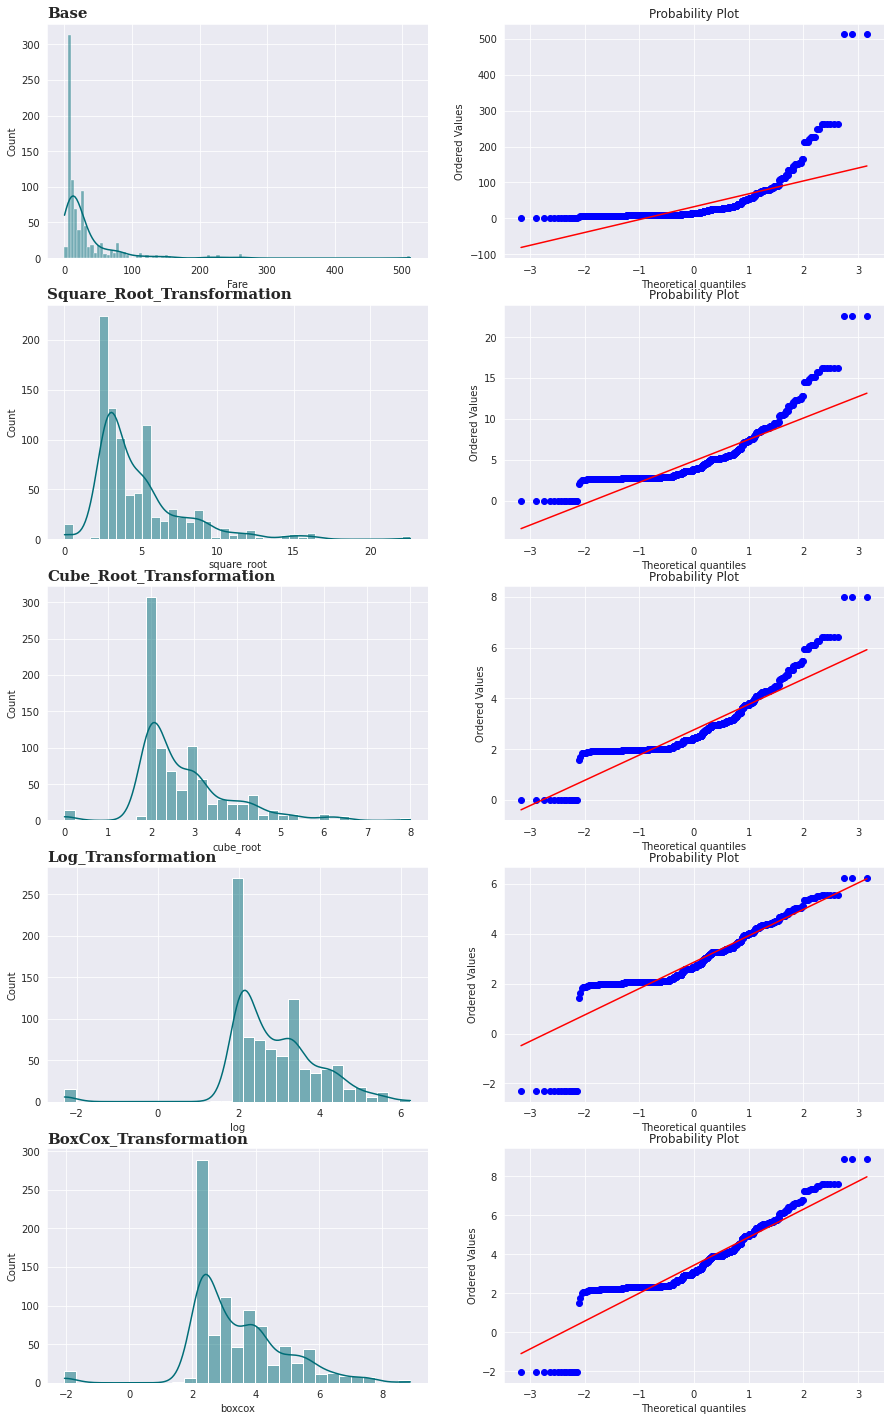

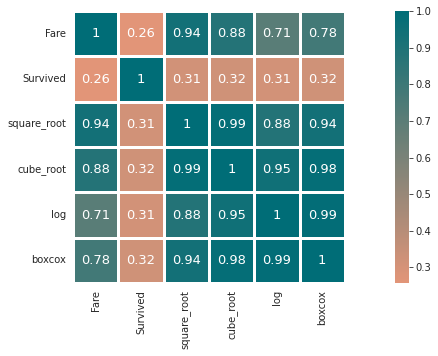

In [36]:
import scipy.stats as stats
from scipy.stats import kstest, norm

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    
    # Create transformations
    _ = df[[col, 'Survived']]
    _['square_root'] = _[col]**(1./2)
    _['cube_root'] = _[col]**(1./3)
    _['log'] = np.log(_[col] + .1)
    _['boxcox'] = pd.Series( stats.boxcox( _[col] + .1 )[0],)
    
    # Compare Histograms and QQplots of each transformation
    plt.figure(figsize = (15, 25))
    plt.subplot(5,2,1)
    sns.histplot(x=_[col], palette=survived, kde=True)
    plt.title('Base',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(5,2,2)
    stats.probplot(_[col], dist="norm", plot=plt)
    
    plt.subplot(5,2,3)
    sns.histplot(x=_['square_root'], palette=survived, kde=True)
    plt.title('Square_Root_Transformation',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(5,2,4)
    stats.probplot(_['square_root'], dist="norm", plot=plt)
    
    plt.subplot(5,2,5)
    sns.histplot(x=_['cube_root'], palette=survived, kde=True)
    plt.title('Cube_Root_Transformation',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(5,2,6)
    stats.probplot(_['cube_root'], dist="norm", plot=plt)
    
    plt.subplot(5,2,7)
    sns.histplot(x=_['log'], palette=survived, kde=True)
    plt.title('Log_Transformation',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(5,2,8)
    stats.probplot(_['log'], dist="norm", plot=plt)   
    
    plt.subplot(5,2,9)
    sns.histplot(x=_['boxcox'], palette=survived, kde=True)
    plt.title('BoxCox_Transformation',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(5,2,10)
    stats.probplot(_['boxcox'], dist="norm", plot=plt)    
    
    # Create correlation matrix
    plt.subplots(figsize=(18, 5))
    sns.heatmap(_.corr(), cmap=cmap, annot=True, linewidths=3, annot_kws={"fontsize":13}, square=True)
    fig.show()
    
#     # Kolmogorov-Smirnov Normality Test
#     print('Kolmogorov-Smirnov Normality Test')
#     print('Base:', kstest(_[col], 'norm'))
#     print('SQR:', kstest(_['square_root'], 'norm'))
#     print('CBR:', kstest(_['cube_root'], 'norm'))
#     print('LOG:', kstest(_['log'], 'norm'))
#     print('BCX:', kstest(_['boxcox'], 'norm'))

QQplot(train_df, 'Fare')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

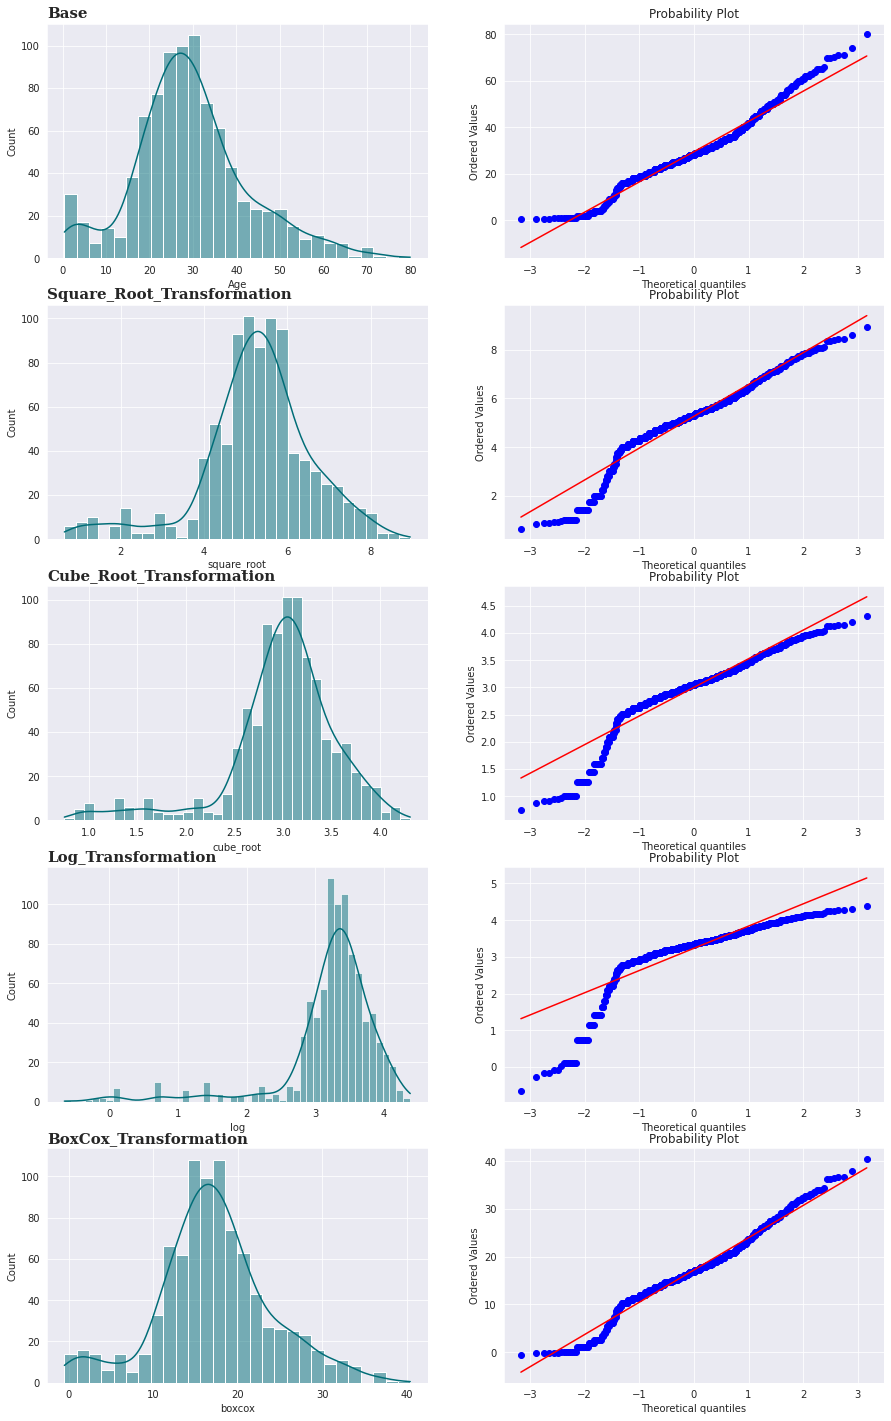

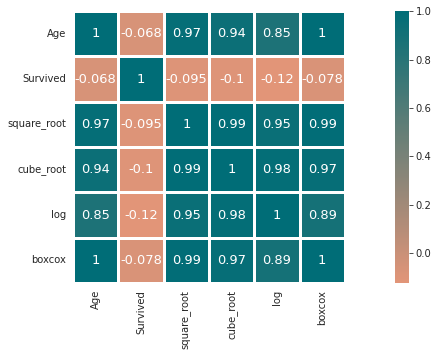

In [37]:
QQplot(train_df, 'Age')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

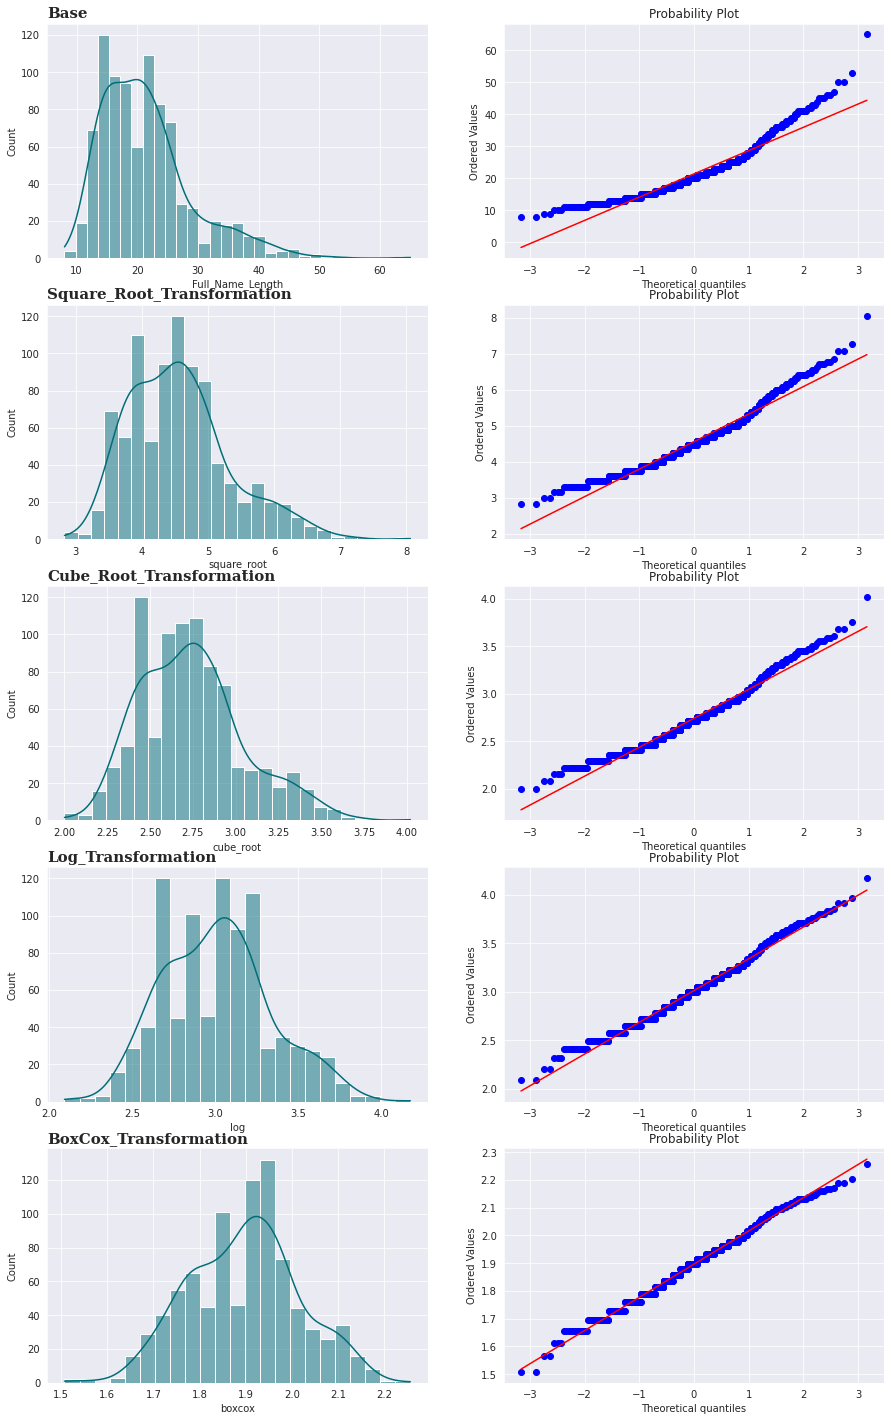

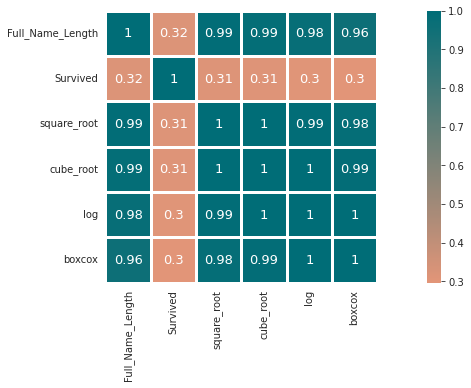

In [38]:
QQplot(train_df, 'Full_Name_Length')

**Conclusion**
- Use **Log** transform to *Full_Name_Length, Fare*
- No transformation for *Age*

# Split Train and Test Data

In [39]:
# Split back to train and test data
train_df = full_df[:train_shape[0]]
test_df = full_df[train_shape[0]:]

In [40]:
imp_features = full_df.select_dtypes(include=np.number).columns.tolist()
imp_features.remove('Survived')
imp_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Full_Name_Length',
 'FamilyGroup_Survival',
 'Null_FamilyGroup_Survival',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'DeckGroup_ABC',
 'DeckGroup_DE',
 'DeckGroup_FGT',
 'DeckGroup_n',
 'FamilySize',
 'FareBin',
 'Child',
 'Elder',
 'Alone']

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# input features
X = train_df.copy()
X_test = test_df.copy()

# target feature
y = X.pop('Survived')

# stratify - make sure classes are evenly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

# Transform
X_train['Fare'] = np.log(X_train['Fare'] + .01)
X_train['Full_Name_Length'] = np.log(X_train['Full_Name_Length'] + .01)



# Standardize
scale = StandardScaler()
X_train[['Age', 'Fare', 'Full_Name_Length']] = scale.fit_transform(X_train[['Age', 'Fare', 'Full_Name_Length']])
X_valid[['Age', 'Fare', 'Full_Name_Length']] = scale.transform(X_valid[['Age', 'Fare', 'Full_Name_Length']])
X_test[['Age', 'Fare', 'Full_Name_Length']] = scale.transform(X_test[['Age', 'Fare', 'Full_Name_Length']])

In [42]:
X_valid[imp_features].isnull().sum()

Pclass                       0
Age                          0
SibSp                        0
Parch                        0
Fare                         0
Full_Name_Length             0
FamilyGroup_Survival         0
Null_FamilyGroup_Survival    0
Sex_male                     0
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
DeckGroup_ABC                0
DeckGroup_DE                 0
DeckGroup_FGT                0
DeckGroup_n                  0
FamilySize                   0
FareBin                      0
Child                        0
Elder                        0
Alone                        0
dtype: int64

In [43]:
X_train[imp_features].isnull().sum()

Pclass                       0
Age                          0
SibSp                        0
Parch                        0
Fare                         0
Full_Name_Length             0
FamilyGroup_Survival         0
Null_FamilyGroup_Survival    0
Sex_male                     0
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
DeckGroup_ABC                0
DeckGroup_DE                 0
DeckGroup_FGT                0
DeckGroup_n                  0
FamilySize                   0
FareBin                      0
Child                        0
Elder                        0
Alone                        0
dtype: int64

In [44]:
X_train = X_train[imp_features]
X_valid = X_valid[imp_features]
X_test = X_test[imp_features]
X_train

,Pclass,Age,SibSp,Parch,Fare,Full_Name_Length,FamilyGroup_Survival,Null_FamilyGroup_Survival,Sex_male,Embarked_C,...,Embarked_S,DeckGroup_ABC,DeckGroup_DE,DeckGroup_FGT,DeckGroup_n,FamilySize,FareBin,Child,Elder,Alone
591,1.0,1.656567,1.0,0.0,1.138575,1.869494,1.0000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0,0,0
697,3.0,0.141783,0.0,0.0,-0.558200,0.624289,0.3838,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,1
512,1.0,0.450769,0.0,0.0,0.338547,-0.039238,1.0000,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0,0,1
785,3.0,-0.378218,0.0,0.0,-0.605470,0.740920,0.3838,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,1
560,3.0,-0.054159,0.0,0.0,-0.556620,-0.191751,0.3838,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2.0,-0.453580,1.0,2.0,1.002367,-0.894561,1.0000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,4.0,3.0,0,0,0
526,2.0,1.505842,0.0,0.0,-0.334133,-0.702691,0.3838,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0,0,1
517,3.0,0.115406,0.0,0.0,0.276369,-1.319963,0.3333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0,0,1
80,3.0,-0.604305,0.0,0.0,-0.447078,-0.702691,0.3838,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,1


# Model Training
I begin training my model by creating a baseline assessment to determine which among the algorithms perform well based on my train and test sets, and work my way towards hyperparameter tuning and ensembling from there. Since I am working with a given dataset with a predetermined solution goal, I am running a form of machine learning algorithm known as supervised learning. Listed below are some common model algorithms to try out.

> If you want to understand the math and fundamentals behind each ML algorithm, I highly recommend watching video tutorials by *StatQuest with Josh Starmer.*

- [Logistic Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjdkvWQ4qT3AhVEQd4KHUvNDPIQwqsBegQIFhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DyIYKR4sgzI8&usg=AOvVaw3maZPWy-T2rEc4PFDM40af)
- [Support Vector Machines](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjM0pq45KT3AhVcQfUHHVYJBysQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DefR1C6CvhmE&usg=AOvVaw1alnpuy6aMk4ogaK4NtmXy)
- [K-Means Nearest Neighbors](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj60qDK5KT3AhUbAYgKHcyoDbAQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DHVXime0nQeI&usg=AOvVaw1h03i8dfC0gXYPU9lFRzJ_)
- [Decision Tree](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi-t-rS5KT3AhWGAogKHbBfBGQQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D7VeUPuFGJHk&usg=AOvVaw2KBODG3Oh7AiSz-4h5wnMd)
- [Random Forest](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiyptHZ5KT3AhWNEYgKHelnCqgQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DJ4Wdy0Wc_xQ&usg=AOvVaw0moI0sPTwd34hRAKxbDRVN)
- XGBoost
- LGBMClassifier
- CatBoost

Another important approach which is crucial here is to conduct cross validation. It is a useful technique to address overfitting as it evaluates models through a fixed number of folds k. In my case, I decided to do 10-fold cross-validation. In other words, I do 10 different subsets of sample from training set to arrive at my solutions, then get the mean of all the accuracy scores from these tests.

In [45]:
from sklearn.model_selection import cross_val_score

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining a list of Machine Learning Algorithms I will be running
MLA = [
    LogisticRegression(max_iter = 2000),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=False)
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results.mean()
    
    row_index+=1

# Present table
MLA_compare.sort_values(by=['Accuracy'], ascending=False, inplace=True)
MLA_compare

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy
7,CatBoostClassifier,0.899751
4,RandomForestClassifier,0.896766
1,SVC,0.890841
0,LogisticRegression,0.890773
5,XGBClassifier,0.889326
6,LGBMClassifier,0.889326
3,DecisionTreeClassifier,0.860855
2,KNeighborsClassifier,0.833853


# Hyperparameter Tuning

I opted to use optuna, no pun intended, to run my optimizations on my Gradient Boost algorithms.
1. CatBoost
2. LGBM
3. XGBoost

So, why did I consider using these as opposed to the conventional way with `GridSearchCV` or `RandomSearchCV`?
- It offers greater versatility in selecting and customizing my grid of parameters.

Another strategy that I implemented is to tune my hyperparameters for each cross validation fold through a **for loop.** What makes this approach more effective?
- Likewise how we want to cross validate on training model algorithms to ensure we get a more robust outcome/score by getting the most of the combinations/folds from the whole data, applying this on optimization runs also ensures that our hyperparameter candidate sets will also be tested and evaluated on the whole dataset.

- This also enables me to define a very useful parameter `early_stopping_rounds` when I fit my models in each CV fold.
> I set this to 100, this means that if the predictions don't improve after 100 trials, the training will stop.

In [46]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# Hypertune XGBoost
def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    
        model = XGBClassifier(**param, use_label_encoder = False)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  early_stopping_rounds = 100,
                  eval_metric = 'logloss',
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [47]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
xgb_params = study.best_trial.params

print(f"\tBest score: {study.best_value:.5f}")
print(f"\tBest params:", study.best_trial.params)

[I 2022-12-26 13:01:03,673] A new study created in memory with name: no-name-c7ec536d-78b9-4b46-8f76-d3702908bc48
[I 2022-12-26 13:01:09,806] Trial 0 finished with value: 0.8872180451127819 and parameters: {'learning_rate': 0.09685465497059165, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.6}. Best is trial 0 with value: 0.8872180451127819.
[I 2022-12-26 13:01:13,769] Trial 1 finished with value: 0.924812030075188 and parameters: {'learning_rate': 0.1533285261419972, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.9}. Best is trial 1 with value: 0.924812030075188.
[I 2022-12-26 13:01:30,053] Trial 2 finished with value: 0.9022556390977443 and parameters: {'learning_rate': 0.018487262832143626, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7}. Best is trial 1 with value: 0.924812030075188.
[I 2022-12-26 13:01:33,398] Trial 3 finished with value: 0.9022556390977443 and parameters: {'learning_rate': 0.15917890618121033, 'max_depth': 9, 'min_child_weight': 3, 'subsam

	Best score: 0.92481
	Best params: {'learning_rate': 0.1533285261419972, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.9}


In [48]:
# Hypertune LGBM
from optuna.integration import LightGBMPruningCallback
from lightgbm import early_stopping

def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=20),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 200, 10000, step=100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    
        model = LGBMClassifier(**param)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  eval_metric = 'logloss',
                  callbacks = [early_stopping(stopping_rounds=100,
                                              verbose = False)],
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [49]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
lgbm_params = study.best_trial.params

print(f"\tBest score: {study.best_value:.5f}")
print(f"\tBest params:", study.best_trial.params)

[I 2022-12-26 13:03:51,467] A new study created in memory with name: no-name-ac0e4610-2c7d-4e93-bde2-d58aa05574a3
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

	Best score: 0.91729
	Best params: {'num_leaves': 1240, 'learning_rate': 0.03489229379207548, 'max_depth': 5, 'min_child_samples': 1, 'reg_alpha': 0.0041305369406469975, 'reg_lambda': 0.17277782045276907, 'subsample': 0.7}


In [50]:
# Hypertune CatBoost
def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    
        model = CatBoostClassifier(**param)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  early_stopping_rounds = 100,
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [51]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
cat_params = study.best_trial.params

print(f"\tBest score: {study.best_value:.5f}")
print(f"\tBest params:", study.best_trial.params)

[I 2022-12-26 13:04:22,215] A new study created in memory with name: no-name-e0e7f8be-af14-4fb3-9f6d-046baed4349f
[I 2022-12-26 13:05:03,581] Trial 0 finished with value: 0.9097744360902256 and parameters: {'learning_rate': 0.016810999742065704, 'max_depth': 12, 'subsample': 0.9}. Best is trial 0 with value: 0.9097744360902256.
[I 2022-12-26 13:05:12,640] Trial 1 finished with value: 0.9172932330827067 and parameters: {'learning_rate': 0.09233365927726217, 'max_depth': 11, 'subsample': 0.8}. Best is trial 1 with value: 0.9172932330827067.
[I 2022-12-26 13:05:13,961] Trial 2 finished with value: 0.9097744360902256 and parameters: {'learning_rate': 0.11875224377555706, 'max_depth': 7, 'subsample': 0.7}. Best is trial 1 with value: 0.9172932330827067.
[I 2022-12-26 13:05:15,816] Trial 3 finished with value: 0.9097744360902256 and parameters: {'learning_rate': 0.16969994039903954, 'max_depth': 8, 'subsample': 0.9}. Best is trial 1 with value: 0.9172932330827067.
[I 2022-12-26 13:05:41,890]

	Best score: 0.91729
	Best params: {'learning_rate': 0.09233365927726217, 'max_depth': 11, 'subsample': 0.8}


In [52]:
# # Optimal parameters
# cat_params = {'learning_rate': 0.09680702637653822, 'max_depth': 11, 'subsample': 0.8}
# lgbm_params = {'num_leaves': 80, 'learning_rate': 0.19028248813460252, 'max_depth': 6, 'min_child_samples': 9, 'reg_alpha': 0.022198765317398134, 'reg_lambda': 0.0054486752392737745, 'subsample': 0.5}
# xgb_params = {'learning_rate': 0.04366702374982929, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8}

# Ensemble Learning
This method aims to improve the model by combining multiple algorithms and classifications in order to reduce the biases while also addressing the weaknesses of using standalone models. There are actually several methods of ensemble learning, listed below are some:
- Majority Voting
- Bagging
- Boosting
- Gradient Boosting
- Random Forests
- Stacking

For now, I will only delve into using the Majority Voting Classifier first as a working example. From the name itself, a voting ensemble involves favoring the class label (i.e. 1=Survived, 0=Died) with the majority or the most votes as the prediction. They are two types of voting:
- **Hard voting.** summing the votes of class labels from other models and selecting the class label with the most votes as the prediction.
- **Soft voting.** summing the predicted probabilities of classes from other models and selecting the class label with largest sum probability as the prediction.

In [53]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

xgb_optimal = XGBClassifier(**xgb_params)
lgbm_optimal = LGBMClassifier(**lgbm_params)
cat_optimal = CatBoostClassifier(**cat_params)

# Creating ensembles for top 3 tuned models
Ensemble_HV = VotingClassifier(estimators =
                               [('XGB', xgb_optimal),
                                ('Cat', cat_optimal),
                                ('LGBM', lgbm_optimal)],
                               voting = 'hard')

Ensemble_SV = VotingClassifier(estimators =
                               [('XGB', xgb_optimal),
                                ('Cat', cat_optimal),
                                ('LGBM', lgbm_optimal)],
                               voting = 'soft')

# Submit Predictions

In [54]:
# Defining a function to predict solutions
def predict(model):
    
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    pred = pd.DataFrame({
    'PassengerId': test_df_copy['PassengerId'],
    'Survived': Y_pred
})
     
    return pred

In [55]:
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier()

In [56]:
predict(xgb).to_csv('submission_xgb.csv', index=False)
predict(lgbm).to_csv('submission_lgbm.csv', index=False)
predict(cat).to_csv('submission_cat.csv', index=False)

predict(xgb_optimal).to_csv('submission_xgb_optimal.csv', index=False)
predict(lgbm_optimal).to_csv('submission_lgbm_optimal.csv', index=False)
predict(cat_optimal).to_csv('submission_xgb_optimal.csv', index=False)

predict(Ensemble_HV).to_csv('submission_HV.csv', index=False)
predict(Ensemble_SV).to_csv('submission_SV.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:09:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008672
0:	learn: 0.6846080	total: 725us	remaining: 725ms
1:	learn: 0.6763286	total: 2.58ms	remaining: 1.29s
2:	learn: 0.6674327	total: 4.13ms	remaining: 1.37s
3:	learn: 0.6584223	total: 5.57ms	remaining: 1.39s
4:	learn: 0.6488731	total: 7.03ms	remaining: 1.4s
5:	learn: 0.6384499	total: 8.51ms	remaining: 1.41s
6:	learn: 0.6284843	total: 9.93ms	remaining: 1.41s
7:	learn: 0.6202189	total: 11.5ms	remaining: 1.42s
8:	learn: 0.6114369	total: 13.1ms	remaining: 1.44s
9:	learn: 0.6028741	total: 14.7ms	remaining: 1.46s
10:	learn: 0.5950925	total: 16.4ms	remaining: 1.48s
11:	learn: 0.5878279	total: 18.4ms	remaining: 1.51s
12:	learn: 0.5806952	total: 21.5ms	remaining: 1.64s
13:	learn: 0.5724623	total: 24.6ms	remaining: 1.73s
14

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0:	learn: 0.6099176	total: 650us	remaining: 650ms
1:	learn: 0.5435425	total: 14.6ms	remaining: 7.27s
2:	learn: 0.4865258	total: 21.3ms	remaining: 7.07s
3:	learn: 0.4358630	total: 28.3ms	remaining: 7.04s
4:	learn: 0.3997486	total: 43.4ms	remaining: 8.63s
5:	learn: 0.3672700	total: 57.6ms	remaining: 9.55s
6:	learn: 0.3393164	total: 70.3ms	remaining: 9.98s
7:	learn: 0.3163988	total: 82.2ms	remaining: 10.2s
8:	learn: 0.2966855	total: 94.8ms	remaining: 10.4s
9:	learn: 0.2838871	total: 96.7ms	remaining: 9.57s
10:	learn: 0.2700575	total: 109ms	remaining: 9.81s
11:	learn: 0.2586120	total: 121ms	remaining: 9.98s
12:	learn: 0.2485162	total: 133ms	remaining: 10.1s
13:	learn: 0.2400833	total: 146ms	remaining: 10.3s
14:	learn: 0.2327906	total: 160ms	remaining: 10.5s
15:	learn: 0.2279578	total: 161ms	remaining: 9.89s
16:	learn: 0.2207969	total: 173ms	remaining: 10s
17:	learn: 0.2124576	total: 186ms	remaining: 10.1s
18:	learn: 0.2062560	total: 198ms	remaining: 10.2s
19:	learn: 0.2000399	total: 211ms	

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:09:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6099176	total: 771us	remaining: 771ms
1:	learn: 0.5435425	total: 9.77ms	remaining: 4.88s
2:	learn: 0.4865258	total: 19.7ms	remaining: 6.55s
3:	learn: 0.4358630	total: 26.4ms	remaining: 6.58s
4:	learn: 0.3997486	total: 40.4ms	remaining: 8.04s
5:	learn: 0.3672700	total: 53ms	remaining: 8.78s
6:	learn: 0.3393164	total: 64.6ms	remaining: 9.17s
7:	learn: 0.3163988	total: 77.7ms	remaining: 9.64s
8:	learn: 0.2966855	total: 90.1ms	remaining: 9.92s
9:	learn: 0.2838871	total: 92ms	remaining: 9.11s
10:	learn: 0.2700575	total: 105ms	remaining: 9.44s
11:	learn: 0.2586120	total: 117ms	remaining: 9.63s
12:	learn: 0.2485162	total: 136ms	remaining: 10.4s
13:	learn: 0.2400833	total: 148ms	remaining: 10.4s
14:	learn: 0.2327906	total: 160ms	remai

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6099176	total: 754us	remaining: 753ms
1:	learn: 0.5435425	total: 8.75ms	remaining: 4.37s
2:	learn: 0.4865258	total: 16.2ms	remaining: 5.38s
3:	learn: 0.4358630	total: 23.6ms	remaining: 5.87s
4:	learn: 0.3997486	total: 37.8ms	remaining: 7.51s
5:	learn: 0.3672700	total: 51.8ms	remaining: 8.57s
6:	learn: 0.3393164	total: 65.1ms	remaining: 9.23s
7:	learn: 0.3163988	total: 78.7ms	remaining: 9.76s
8:	learn: 0.2966855	total: 93.1ms	remaining: 10.3s
9:	learn: 0.2838871	total: 94.9ms	remaining: 9.4s
10:	learn: 0.2700575	total: 110ms	remaining: 9.87s
11:	learn: 0.2586120	total: 126ms	remaining: 10.4s
12:	learn: 0.2485162	total: 142ms	remaining: 10.8s
13:	learn: 0.2400833	total: 163ms	remaining: 11.5s
14:	learn: 0.2327906	total: 180ms	re

In [57]:
# from tensorflow import keras
# from tensorflow.keras import layers

# model = keras.Sequential([
#     layers.Dense(11, activation='relu', input_shape=input_shape),
#     layers.Dense(11, activation='relu'), 
#     layers.Dense(11, activation='relu'),
#     layers.Dense(1, activation='sigmoid'),
# ])

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )

# # Model compile
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_valid, y_valid),
#     batch_size=512,
#     epochs=10000,
#     callbacks=[early_stopping],
#     verbose=0, # hide the output because we have so many epochs
# )

# # Evaluate loss and accuracy
# history_df = pd.DataFrame(history.history)
# # Start the plot at epoch 5
# history_df.loc[5:, ['loss', 'val_loss']].plot()
# history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

# print(("Best Validation Loss: {:0.4f}" +\
#       "\nBest Validation Accuracy: {:0.4f}")\
#       .format(history_df['val_loss'].min(), 
#               history_df['val_binary_accuracy'].max()))

#### Update Logs (Version 2)
- Introduced new model alogirthms `XGBoostClassifier`, `LGBMClassifier`, `CatBoostClassifier` for comparison in model training
- Integrated `optuna` in hyperparameter tuning.
- Employed advanced feature engineering to come up with more robust and meaningful features such as *AgeBin, FareBin, and FamilyBin*.
- Enhanced the readability and aesthetics of visualizations

Any form of feedback and advise are welcome. If you have any questions and clarifications regarding my code and work, feel free to ask them in the comments section and I will be happy to engage and answer them.

### My Other Works
If you are interested, you can go to my Kaggle profile [HERE](https://www.kaggle.com/shilongzhuang) and browse through my other works and contributions.

---
# References
Special thanks and credits to these informative resources (notebooks) and guides created by talented professionals in the field.
- [A Data Science Framework: To Achieve 99% Accuracy | Kaggle](https://www.kaggle.com/code/shilongzhuang/a-data-science-framework-to-achieve-99-accuracy/edit)
- [Titanic Data Science Solutions | Kaggle](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)